# Mutimodel RAG using GPT text embedding and CLIP image embedding
Encoder:


*   GPT embedding from OpenAI for texts
*   [CLIP](https://github.com/openai/CLIP) embedding from OpenAI for images

In [1]:
!pip install -q llama-index-vector-stores-qdrant

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.4/266.4 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into a

In [2]:
!pip install llama_index ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP
!pip install -U qdrant_client
!pip install torch torchvision
!pip install matplotlib scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.8/173.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 15.8 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP to /tmp/pip-req-build-ig67p4rb
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP /tmp/pip-req-build-ig67p4rb
  Resolved https://github.com/openai/CLIP to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=cdeb13c644844474ed742728f8d34d522f0cebe508859e47b4fa5bb554ec2126
  Stored in directory: /tmp/pip-ephem-wheel-cache-57411

In [3]:
!pip install llama-index-embeddings-clip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

# Load and Download Mult-Model datasets including texts and images



In [4]:
from pathlib import Path
import requests

wiki_titles = [
    "Tesla",
    "SpaceX",
    "Neuralink",
    "Elon Musk",
    "Twitter"
]

data_path = Path('data_wiki')

for title in wiki_titles:
  response = requests.get(
      f"https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&explaintext=&titles={title}",
      params={
          'action': 'query',
          'format': 'json',
          'titles': title,
          'prop': 'extracts',
          # 'exintro': True,
          'explaintext': True,
      },
  ).json()
  page = next(iter(response['query']['pages'].values()))
  wiki_text = page['extract']

  if not data_path.exists():
    Path.mkdir(data_path)
  with open(data_path / f"{title}.txt", "w") as fp:
    fp.write(wiki_text)


## Parse Wikipedia Images and texts. Load into local folder

In [5]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=4237a823d2c1289c620b2f19a4c065ab6effd34f782f881b2298b09580f07a5b
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [6]:
import wikipedia
import requests
import json
import urllib.request

image_path = Path("data_wiki")
image_uuid = 0
# image_metadata_dict stores images metadata including image uuid, filename and path
image_metadata_dict = {}
MAX_IMAGES_PER_WIKI = 30

WIKI_REQUEST = 'http://en.wikipedia.org/w/api.php?action=query&prop=pageimages&format=json&piprop=original&titles='

def get_wiki_image(search_term):
    try:
        result = wikipedia.search(search_term, results = 1)
        wikipedia.set_lang('en')
        wkpage = wikipedia.WikipediaPage(title = result[0])
        title = wkpage.title
        response  = requests.get(WIKI_REQUEST+title)
        json_data = json.loads(response.text)
        img_link = list(json_data['query']['pages'].values())[0]['original']['source']
        return img_link
    except:
        return 0

# create folder for images only
if not image_path.exists():
    Path.mkdir(image_path)

for title in wiki_titles:
    images_per_wiki = 0
    try:
      url = get_wiki_image(title)
      print(url)
      if url.endswith(".jpg") or url.endswith(".png"):
        image_uuid += 1
        image_file_name = title + "_" + url.split("/")[-1]

        # img_path could be s3 path pointing to the raw image file in the future
        image_metadata_dict[image_uuid] = {
            "filename": image_file_name,
            "img_path": "./" + str(image_path / f"{image_uuid}.jpg"),
        }
        urllib.request.urlretrieve(
            url, image_path / f"{image_uuid}.jpg"
        )
        images_per_wiki += 1
        # Limit the number of images downloaded per wiki page to 15
        if images_per_wiki > MAX_IMAGES_PER_WIKI:
            break
    except:
        print(str(Exception("No images found for Wikipedia page: ")) + title)
        continue


https://upload.wikimedia.org/wikipedia/commons/b/bd/Tesla_Motors.svg
https://upload.wikimedia.org/wikipedia/commons/e/e3/Starbase.jpg
https://upload.wikimedia.org/wikipedia/commons/4/44/Neuralink_logo.svg
https://upload.wikimedia.org/wikipedia/commons/c/cb/The_Prime_Minister%2C_Shri_Narendra_Modi_meeting_Mr._Elon_Musk_in_New_York%2C_USA_on_June_20%2C_2023_%282%29_%28cropped%29_%28b%29.jpg
https://upload.wikimedia.org/wikipedia/commons/c/ce/X_logo_2023.svg


In [7]:
"""
import wikipedia
import urllib.request



image_path = Path("data_wiki")
image_uuid = 0
# image_metadata_dict stores images metadata including image uuid, filename and path
image_metadata_dict = {}
MAX_IMAGES_PER_WIKI = 30

wiki_titles = [
    "Tesla",
    "SpaceX",
    "Elon Musk",
    "Twitter"
]

# create folder for images only
if not image_path.exists():
    Path.mkdir(image_path)


# Download images for wiki pages
# Adding UUID for each image
for title in wiki_titles:
    images_per_wiki = 0
    try:
        list_img_urls = get_wiki_image('title')
        print(list_img_urls)
        for url in list_img_urls:
            if url.endswith(".jpg") or url.endswith(".png"):
                image_uuid += 1
                image_file_name = title + "_" + url.split("/")[-1]

                # img_path could be s3 path pointing to the raw image file in the future
                image_metadata_dict[image_uuid] = {
                    "filename": image_file_name,
                    "img_path": "./" + str(image_path / f"{image_uuid}.jpg"),
                }
                urllib.request.urlretrieve(
                    url, image_path / f"{image_uuid}.jpg"
                )
                images_per_wiki += 1
                # Limit the number of images downloaded per wiki page to 15
                if images_per_wiki > MAX_IMAGES_PER_WIKI:
                    break
    except:
        print(str(Exception("No images found for Wikipedia page: ")) + title)
        continue
"""

'\nimport wikipedia\nimport urllib.request\n\n\n\nimage_path = Path("data_wiki")\nimage_uuid = 0\n# image_metadata_dict stores images metadata including image uuid, filename and path\nimage_metadata_dict = {}\nMAX_IMAGES_PER_WIKI = 30\n\nwiki_titles = [\n    "Tesla",\n    "SpaceX",\n    "Elon Musk",\n    "Twitter"\n]\n\n# create folder for images only\nif not image_path.exists():\n    Path.mkdir(image_path)\n\n\n# Download images for wiki pages\n# Adding UUID for each image\nfor title in wiki_titles:\n    images_per_wiki = 0\n    try:\n        list_img_urls = get_wiki_image(\'title\')\n        print(list_img_urls)\n        for url in list_img_urls:\n            if url.endswith(".jpg") or url.endswith(".png"):\n                image_uuid += 1\n                image_file_name = title + "_" + url.split("/")[-1]\n\n                # img_path could be s3 path pointing to the raw image file in the future\n                image_metadata_dict[image_uuid] = {\n                    "filename": im

In [8]:
import os

from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

## Build Multi Modal Vector Store using Text and Image embeddings under

In [9]:
import qdrant_client
from llama_index.core import SimpleDirectoryReader
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.core.indices import MultiModalVectorStoreIndex

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_d_0")

text_store = QdrantVectorStore(
    client=client, collection_name="text_collection_0"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection_0"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# Create the MultiModal index
documents = SimpleDirectoryReader("./data_wiki/").load_data()
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 144MiB/s]


### Plot downloaded Images from Wikipedia

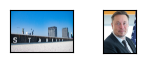

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import os


def plot_images(image_metadata_dict):
    original_images_urls = []
    images_shown = 0
    for image_id in image_metadata_dict:
        img_path = image_metadata_dict[image_id]["img_path"]
        if os.path.isfile(img_path):
            filename = image_metadata_dict[image_id]["filename"]
            image = Image.open(img_path).convert("RGB")

            plt.subplot(8, 8, len(original_images_urls) + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            original_images_urls.append(filename)
            images_shown += 1
            if images_shown >= 64:
                break

    plt.tight_layout()


plot_images(image_metadata_dict)

### Build a separate CLIP image embedding index under a differnt collection wikipedia_img


In [11]:
def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break

## Get Multi-Modal retrieval results for some example queries


In [14]:
test_query = "what is SpaceX?"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5)
retrieval_results = retriever.retrieve(test_query)
retrieval_results

[NodeWithScore(node=TextNode(id_='5e60c267-f245-4589-820e-9e31564dc9c8', embedding=None, metadata={'file_path': '/content/data_wiki/SpaceX.txt', 'file_name': 'SpaceX.txt', 'file_type': 'text/plain', 'file_size': 1651, 'creation_date': '2024-10-17', 'last_modified_date': '2024-10-17'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='a7eb6ec6-1e5e-478a-b7e5-723bbe00641a', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_path': '/content/data_wiki/SpaceX.txt', 'file_name': 'SpaceX.txt', 'file_type': 'text/plain', 'file_size': 1651, 'creation_date': '2024-10-17', 'last_modified_date': '2024-10-17'}, hash='735a77f78120350b0844e9d51fe5bc2d891957ee230596d2b8861a22ff7f25ec')}, text="Space Exploration Technolog

**Node ID:** 5e60c267-f245-4589-820e-9e31564dc9c8<br>**Similarity:** 0.9064227709288281<br>**Text:** Space Exploration Technologies Corporation, commonly referred to as SpaceX, is an American spacecraft manufacturer, launch service provider, and satellite communications company headquartered at th...<br>

**Node ID:** 07eb732a-8244-43c2-a480-6191b40a896b<br>**Similarity:** 0.824565078369166<br>**Text:** Elon Reeve Musk  (; born June 28, 1971) is a businessman and investor known for his key roles in the space company SpaceX and the automotive company Tesla, Inc. Other involvements include ownership...<br>

**Node ID:** 01743d0d-d466-4364-a6b5-598f2c219add<br>**Similarity:** 0.7589576450759313<br>**Text:** Neuralink Corp. is an American neurotechnology company that has developed, as of 2024, implantable brain–computer interfaces (BCIs). It was founded by Elon Musk and a team of seven scientists and e...<br>

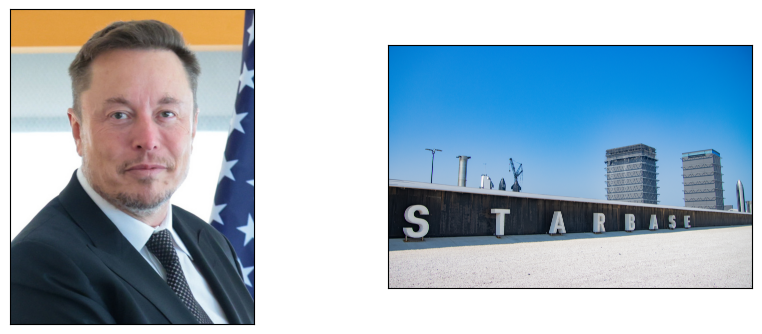

In [15]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)